#NEURAL NETWORKS AND DEEP LEARNING

---
A.A. 2021/22 (6 CFU) - Dr. Alberto Testolin, Dr. Umberto Michieli
---


# Homework 3 - Deep Reinforcement Learning

In [ ]:
# environment modules
import random
import numpy as np
import gym
import matplotlib.pyplot as plt
import torch 
from torch import nn
import seaborn as sns
sns.set_theme()

# self-made modules
from models import DQN, ReplayMemory, train_loop_pole, train_loop_lander, test_loop
from utils import wrap_env, show_videos, exp_prof, exp_prof_egr
from policies import choose_action_softmax, choose_action_epsilon_greedy

# CartPole-v1

In [ ]:
# create environment
env = gym.make('CartPole-v1') 
env.seed(0)

# get state and action space dimension
state_space_dim = env.observation_space.shape[0]
action_space_dim = env.action_space.n

In [ ]:
# initialize replay memory
replay_mem = ReplayMemory(10000)    

# initialize the networks
policy_net = DQN(state_space_dim, action_space_dim)

target_net = DQN(state_space_dim, action_space_dim)

# loading policy net weights to the target net
target_net.load_state_dict(policy_net.state_dict()) 

<All keys matched successfully>

## Hyperparameters definition and training

In [ ]:
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)
 
# exploration profiles for softmax and egreedy
exploration_profile_egr = exp_prof_egr(0.5,500)
exploration_profile = exp_prof(6,400)

# hyperparameters definition for training
hyper = { "bad_state_penalty": -0.7,
    "min_samples_for_training" : 500,
    "gamma" : 0.97,
    "optimizer" : torch.optim.Adam,
    "lr" : np.linspace(1e-3,1e-4,500),
    "loss_fn" : nn.SmoothL1Loss(),
    "batch_size" : 64,
    "target_net_update_steps" : 5}


In [17]:
# training Loop start
policy_net, target_net, rewards = train_loop_pole(env,policy_net,target_net,exploration_profile_egr,
 choose_action_epsilon_greedy, replay_mem,
  hyper, pen = lambda x,y : -np.abs(x[0]),
  early_stopping_pars= [10,490]
  )

# loading the best network weights
policy_net.load_state_dict(torch.load("params/gym_cart_egreedy.pth"))

<All keys matched successfully>

In [18]:
# torch.save(policy_net.state_dict(), "params/gym_cart_egreedy.pth")
# torch.save(policy_net.state_dict(), "params/gym_cart_softmax.pth")

In [5]:
# np.save("params/rewards_softmax",rewards)
# np.save("params/rewards_egreedy",rewards)
scores_softmax = np.load("params/rewards_softmax.npy")
scores_egreedy = np.load("params/rewards_egreedy.npy")

## Plots

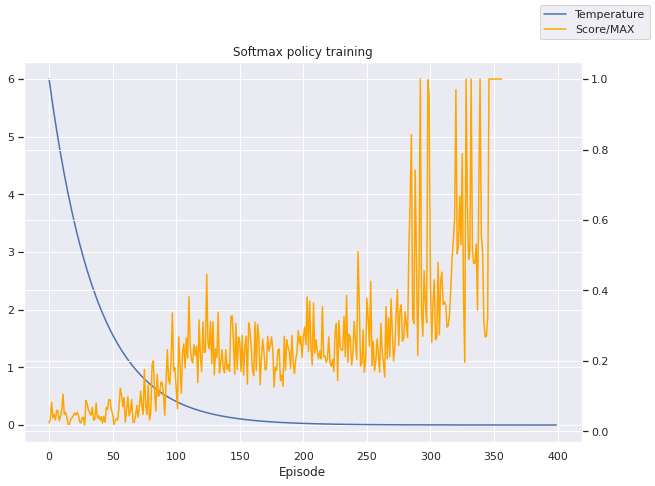

In [7]:
# plotting the scores for the softmax exploration

fig,ax = plt.subplots(1,1, figsize=(10,7))

plt.xlabel('Episode')
ax2 = ax.twinx()

scores_softmax = scores_softmax[:len(scores_softmax[scores_softmax!=0])]

sns.lineplot(x=np.arange(len(scores_softmax)), y = scores_softmax/500, label="Score/MAX", markers= True,ax=ax2, color="orange", legend=False)
sns.lineplot(x=np.arange(len(exploration_profile)), y = exploration_profile, label="Temperature", markers= True, ax=ax, legend=False)

ax.figure.legend()
plt.savefig("images/pole_softmax_rewards.pdf")
plt.title("Softmax policy training")
plt.show()


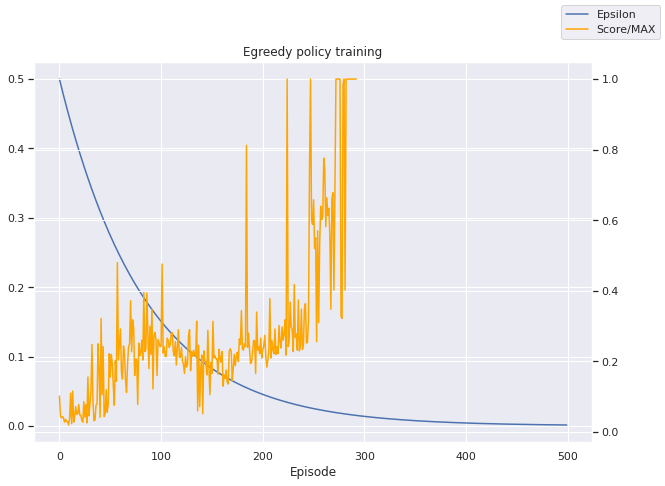

In [8]:
# plotting the scores for the egreedy exploration

fig,ax = plt.subplots(1,1, figsize=(10,7))


plt.xlabel('Episode')
ax2 = ax.twinx()

scores_egreedy = scores_egreedy[:len(scores_egreedy[scores_egreedy!=0])]

sns.lineplot(x=np.arange(len(scores_egreedy)), y = scores_egreedy/500, label="Score/MAX", markers= True, ax=ax2, color="orange", legend=False)
sns.lineplot(x=np.arange(len(exploration_profile_egr)), y = exploration_profile_egr, label="Epsilon", markers= True, ax= ax, legend=False)

ax.figure.legend()

plt.savefig("images/pole_egreedy_rewards.pdf")
plt.title("Egreedy policy training")
plt.show()

## Test loop

In [ ]:
env = wrap_env(env, video_callable=lambda episode_id: True) # save a video every episode

# to test the approximation
test_loop(env, choose_action_softmax, policy_net)

In [ ]:
# to show videos associated to test episodes
show_videos()

In [24]:
!rm video/*

# LunarLander-v2

In [11]:
# create environment
env = gym.make('LunarLander-v2') 
env.seed(0)

# get state and action space dimension
state_space_dim = env.observation_space.shape[0]
action_space_dim = env.action_space.n

In [12]:
# initialize replay memory
replay_mem = ReplayMemory(30000)    

# initialize the networks
policy_net = DQN(state_space_dim, action_space_dim)
target_net = DQN(state_space_dim, action_space_dim)

# loading policy network parameters to the target network
target_net.load_state_dict(policy_net.state_dict()) 

<All keys matched successfully>

## Hyperparameters and training

In [13]:
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)

# creating exploration profiles
exploration_profile_egr = exp_prof_egr(0.5,800)
exploration_profile = exp_prof(2,800)

# hyperparameters definition
hyper = { "min_samples_for_training" : 500,
    "gamma" : 0.99,
    "optimizer" : torch.optim.Adam,
    "lr" : np.linspace(2e-4,1e-4,1200),
    "loss_fn" : nn.SmoothL1Loss(),
    "batch_size" : 8,
    "target_net_update_steps" : 5}


In [14]:
# # start training process
# policy_net, target_net, scores = train_loop_lander(env,policy_net,target_net,exploration_profile, 
#         choose_action_softmax, replay_mem, hyper,
#         early_stopping_pars= [10,220], pen = lambda x,y : 0, render=True)

# loading the best network weights
policy_net.load_state_dict(torch.load("params/lander_egreedy.pth"))

<All keys matched successfully>

In [15]:
# torch.save(policy_net.state_dict(), "params/lander_egreedy2.pth")
# torch.save(policy_net.state_dict(), "params/lander_softmax.pth")

In [16]:
# np.save("params/lander_rewards_softmax",scores)
# np.save("params/lander_rewards_egreedy2",scores)
scores_softmax = np.load("params/lander_rewards_softmax.npy")
scores_egreedy = np.load("params/lander_rewards_egreedy.npy")
scores_egreedy2 = np.load("params/lander_rewards_egreedy2.npy")

## Plots

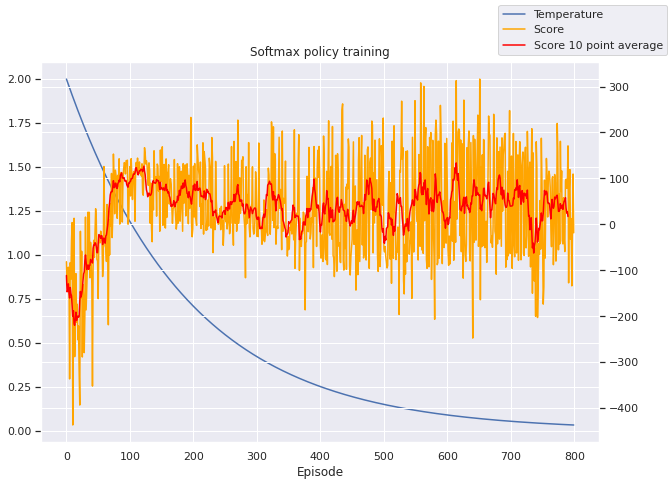

In [17]:
# plotting the scores for the softmax exploration

fig,ax = plt.subplots(1,1, figsize=(10,7))
plt.xlabel('Episode')

ax2 = ax.twinx()

sns.lineplot(x=np.arange(len(scores_softmax)), y = scores_softmax, label="Score", markers= True,ax=ax2, color="orange", legend=False)
sns.lineplot(x=np.arange(len(np.convolve(scores_softmax, np.ones(10)/10, mode='valid'))), y = np.convolve(scores_softmax, np.ones(10)/10, mode='valid'), label="Score 10 point average", markers= True,ax=ax2, color="red", legend=False)
sns.lineplot(x=np.arange(len(scores_softmax)), y = exploration_profile, label="Temperature", markers= True, ax=ax, legend=False)

ax.figure.legend()
plt.savefig("images/lander_softmax_rewards.pdf")

plt.title("Softmax policy training")
plt.show()

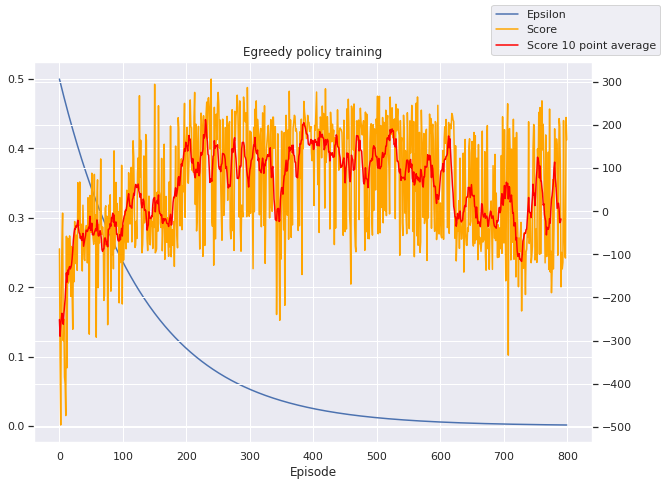

In [18]:
# plotting the scores for the egreedy exploration with early stopping

fig,ax = plt.subplots(1,1, figsize=(10,7))
plt.xlabel('Episode')

ax2 = ax.twinx()

sns.lineplot(x=np.arange(len(scores_egreedy2)), y = scores_egreedy2, label="Score", markers= True, ax=ax2, color="orange", legend=False)
sns.lineplot(x=np.arange(len(np.convolve(scores_egreedy2, np.ones(10)/10, mode='valid'))), y = np.convolve(scores_egreedy2, np.ones(10)/10, mode='valid'), label="Score 10 point average", markers= True,ax=ax2, color="red", legend=False)
sns.lineplot(x=np.arange(len(scores_egreedy2)), y = exploration_profile_egr, label="Epsilon", markers= True, ax= ax, legend=False)

ax.figure.legend()
plt.savefig("images/lander_egreedy1_rewards.pdf")

plt.title("Egreedy policy training")
plt.show()

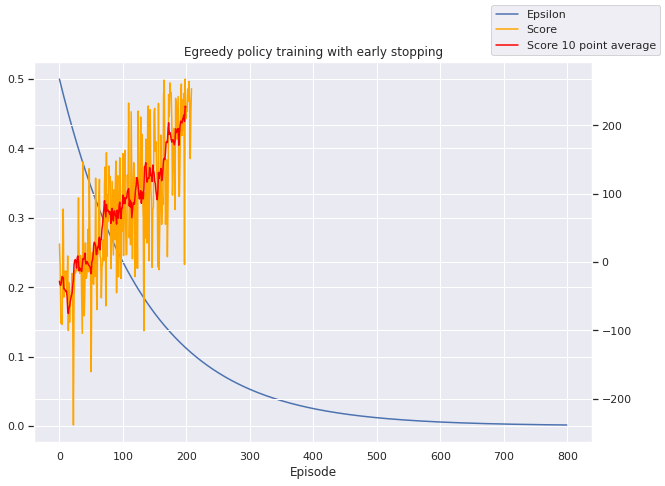

In [19]:
# plotting the scores for the egreedy exploration

fig,ax = plt.subplots(1,1, figsize=(10,7))
plt.xlabel('Episode')

ax2 = ax.twinx()

scores_egreedy = scores_egreedy[:len(scores_egreedy[scores_egreedy!=0])]

sns.lineplot(x=np.arange(len(scores_egreedy)), y = scores_egreedy, label="Score", markers= True, ax=ax2, color="orange", legend=False)
sns.lineplot(x=np.arange(len(np.convolve(scores_egreedy, np.ones(10)/10, mode='valid'))), y = np.convolve(scores_egreedy, np.ones(10)/10, mode='valid'), label="Score 10 point average", markers= True,ax=ax2, color="red", legend=False)
sns.lineplot(x=np.arange(len(exploration_profile_egr)), y = exploration_profile_egr, label="Epsilon", markers= True, ax= ax, legend=False)

ax.figure.legend()
plt.savefig("images/lander_egreedy2_rewards.pdf")

plt.title("Egreedy policy training with early stopping")
plt.show()

## Test loop 

In [ ]:
env = wrap_env(env, video_callable=lambda episode_id: True) # save a video every episode

# testing the approximation
test_loop(env, choose_action_softmax, policy_net)

In [ ]:
# to show videos associated to test episodes
show_videos()

In [11]:
!rm video/*